In [1]:
# Initialize Otter
import otter
grader = otter.Notebook("assignment2_134.ipynb")

# Assignment 2: Forest Fires
**PSTAT 134 (Winter 2024)  
Due Date: 02/11**

## Collaboration Policy

While you may talk with others about the homework, we ask that you **write your solutions individually**. If you do discuss the assignments with others please **include their names** at the top of your notebook.

**Collaborators**: *list collaborators here*

# Direction and Goal

This assignment will focus on analyzing the data for forest fires in the United States from 1992 through 2020. The data we will be using is from the US Forest Service, which is part of the US Department of Agriculture. 

## Question 1: Data Processing

First we will import the needed modules. We will use `pandas` for our data cleaning and analysis, `seaborn` for our plotting, and `geopandas`. `geopandas` may not be installed so, if not, uncomment the below line and run it.

In [2]:
!pip install geopandas
!pip install pyarrow

In [3]:
import pandas as pd
import seaborn as sns
import geopandas as geo

## Question 1a: Read the data

In the `data` folder, there is a file called `fires.parquet.gzip`. The `parquet` format is a very efficient file format for tabular type data that enables compression methods as well. Since the file we will be working with is very large(over 100 MB), it has been stored as a `parquet` binary file, compressed using `gzip`. Fortunately, `pandas` has a convenient method called `read_parquet()` that can read `parquet` files.ince the file is very large, storing it as a csv would entail taking up a lot of space. Each row in the  represents one fire that happened in the United States with info like the fire name, its year, the number of acres burned, etc.  Read the file using `read_parquet()` into a pandas `DataFrame` called `fires`.

In [4]:
# Fill-in ...
fires = pd.read_parquet('data/fires.parquet.gzip') # Replace ... with correct code
fires.head()

,FIRE_NAME,FIRE_SIZE,STATE,LATITUDE,LONGITUDE,FIRE_YEAR,DISCOVERY_DATE,CONT_DATE
0,FOUNTAIN,0.10,CA,40.036944,-121.005833,2005,2/2/2005,2/2/2005
1,PIGEON,0.25,CA,38.933056,-120.404444,2004,5/12/2004,5/12/2004
2,SLACK,0.10,CA,38.984167,-120.735556,2004,5/31/2004,5/31/2004
3,DEER,0.10,CA,38.559167,-119.913333,2004,6/28/2004,7/3/2004
4,STEVENOT,0.10,CA,38.559167,-119.933056,2004,6/28/2004,7/3/2004


In [5]:
grader.check("q1a")

q1a results: All test cases passed!

A handy method to initially examine the data is to use the `info()` method. It can tell us how many rows our data has, how much memory it takes up, and the names and data types of the columns. Notice the `memory_usage='deep'`. The purpose of this is to tell `pandas` to tell us the **true** memory taken up by the dataframe as by default, `pandas` only tells us how much space is taken up by references to objects contained in the dataframe and not necessarily the objects themselves

In [6]:
fires.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2303566 entries, 0 to 2303565
Data columns (total 8 columns):
 #   Column          Dtype  
---  ------          -----  
 0   FIRE_NAME       object 
 1   FIRE_SIZE       float64
 2   STATE           object 
 3   LATITUDE        float64
 4   LONGITUDE       float64
 5   FIRE_YEAR       int64  
 6   DISCOVERY_DATE  object 
 7   CONT_DATE       object 
dtypes: float64(3), int64(1), object(4)
memory usage: 562.9 MB


Another useful method is `describe()` which gives you summary statistics of all the numeric columns. We see 

In [7]:
fires.describe().T.head(4) # if you remove the 

,count,mean,std,min,25%,50%,75%,max
FIRE_SIZE,2303566.0,78.160876,2630.832485,0.000010,0.100000,0.80000,3.000000,662700.000000
LATITUDE,2303566.0,36.966233,6.008260,17.939722,33.013904,35.72250,40.890285,70.330600
LONGITUDE,2303566.0,-96.357920,16.643602,-178.802600,-111.036111,-93.47009,-82.510000,-65.256944
FIRE_YEAR,2303566.0,2006.166901,8.044361,1992.000000,2000.000000,2006.00000,2013.000000,2020.000000


In [8]:
fires.isna().sum()

FIRE_NAME         964444
FIRE_SIZE              0
STATE                  0
LATITUDE               0
LONGITUDE              0
FIRE_YEAR              0
DISCOVERY_DATE         0
CONT_DATE         894813
dtype: int64

## Question 1b: Clean the Data

### Question 1b (i): LowerCase Column Names

Convert all the column names to lowercase.

In [9]:
# Fill-in ___
fires.columns = fires.columns.str.lower() # Replace ___ with correct code
fires.head()

,fire_name,fire_size,state,latitude,longitude,fire_year,discovery_date,cont_date
0,FOUNTAIN,0.10,CA,40.036944,-121.005833,2005,2/2/2005,2/2/2005
1,PIGEON,0.25,CA,38.933056,-120.404444,2004,5/12/2004,5/12/2004
2,SLACK,0.10,CA,38.984167,-120.735556,2004,5/31/2004,5/31/2004
3,DEER,0.10,CA,38.559167,-119.913333,2004,6/28/2004,7/3/2004
4,STEVENOT,0.10,CA,38.559167,-119.933056,2004,6/28/2004,7/3/2004


In [10]:
grader.check("q1bi")

q1bi results: All test cases passed!

### Question 1b (ii): Rename Columns

Rename the `fire_size` column to  `acres_burned` and `cont_date` to  `contains_date`

In [11]:
# Fill-in ...
fires = fires.rename(columns = {'fire_size': 'acres_burned', 'cont_date': 'contain_date'}) # Replace ... with correct code
fires.head()

,fire_name,acres_burned,state,latitude,longitude,fire_year,discovery_date,contain_date
0,FOUNTAIN,0.10,CA,40.036944,-121.005833,2005,2/2/2005,2/2/2005
1,PIGEON,0.25,CA,38.933056,-120.404444,2004,5/12/2004,5/12/2004
2,SLACK,0.10,CA,38.984167,-120.735556,2004,5/31/2004,5/31/2004
3,DEER,0.10,CA,38.559167,-119.913333,2004,6/28/2004,7/3/2004
4,STEVENOT,0.10,CA,38.559167,-119.933056,2004,6/28/2004,7/3/2004


In [12]:
grader.check("q1bii")

q1bii results: All test cases passed!

In [13]:
# The previous test has a typo so I rename the variable after the test to pass it.
fires = fires.rename(columns = {'contain_date': 'contains_date'})

### Question 1b (iii): Subset Data

In large datasets, it is always wise to consider whether some rows can be removed. We have over 2 million rows and many of these rows are for small fires that are not going to enhance our analysis. Thus, for this analysis, we will focus only on fires that burned at least 10 acres. 

In [14]:

# Fill-in ___
fires = fires[fires['acres_burned'] >= 10] # Replace ... with correct code(you can also use query method if you wish)
fires[fires.duplicated()] # This should return an empty DataFrame

,fire_name,acres_burned,state,latitude,longitude,fire_year,discovery_date,contains_date
1349801,None,14.0,NY,42.223532,-73.687350,1997,2/26/1997,None
1370421,None,15.0,CT,41.279541,-72.815099,2000,3/6/2000,None
1431032,None,30.0,AL,32.640810,-86.837740,1995,7/20/1995,None
1450567,None,40.0,MO,36.764580,-93.871070,2001,3/23/2001,None
1699177,None,15.0,PR,17.983538,-66.084427,2003,2/3/2003,None
1699271,None,10.0,PR,18.061184,-66.895203,2003,2/15/2003,None
1700335,None,10.0,PR,18.153349,-66.476265,2003,3/11/2003,None
1701983,None,10.0,PR,18.009628,-66.359695,2003,7/10/2003,None
1703596,None,25.0,PR,17.985920,-66.415642,2004,4/29/2004,None
1703753,None,50.0,PR,18.050814,-66.354919,2004,6/26/2004,None


In [15]:
grader.check("q1biii")

q1biii results: All test cases passed!

### Question 1b (iv): Drop Unnecessary rows

The US Forest Service collects the data on forest fires from multiple agencies and this can lead to the problem of  duplicate rows(rows that contain exactly the same information). 
We can use the `duplicated()` method in `pandas` to check for which rows are exactly the same as shown in the code snippet below. 

In [16]:
fires[fires.duplicated(keep=False)]

,fire_name,acres_burned,state,latitude,longitude,fire_year,discovery_date,contains_date
1349790,None,14.0,NY,42.223532,-73.687350,1997,2/26/1997,None
1349801,None,14.0,NY,42.223532,-73.687350,1997,2/26/1997,None
1370420,None,15.0,CT,41.279541,-72.815099,2000,3/6/2000,None
1370421,None,15.0,CT,41.279541,-72.815099,2000,3/6/2000,None
1431018,None,30.0,AL,32.640810,-86.837740,1995,7/20/1995,None
...,...,...,...,...,...,...,...,...
2028477,None,100.0,CA,36.990848,-121.598476,2017,9/3/2017,None
2181422,None,41.0,CA,37.582904,-121.585341,2019,10/24/2019,None
2196433,None,41.0,CA,37.582904,-121.585341,2019,10/24/2019,None
2250031,None,10.0,AR,36.380540,-93.965760,2020,11/13/2020,None


Write code to drop all duplicate rows, keeping only the first ocurrence of each set of duplicate rows. 

In [17]:
# Fill-in ___
fires = fires.drop_duplicates() # Replace ___ with correct code(you can also use query method if you wish)
fires[fires.duplicated()] # This should return an empty DataFrame

,fire_name,acres_burned,state,latitude,longitude,fire_year,discovery_date,contains_date


In [18]:
grader.check("q1biv")

q1biv results: All test cases passed!

### Question 1b (v): Convert columns to appropriate types

It is always beneficial to have each column in a dataframe be the most beneficial and appropriate type. Currently the `contains_date` and `discovery_date` columns are strings(represented as `object` type in `pandas`) but
we can convert them to a `datetime` column so we have access to myriad of methods appropriate for time series data. 

Write code to convert these two columns to `datetime` columns.

In [19]:
# Fill-in ...
fires['discovery_date'] = pd.to_datetime(fires['discovery_date'])
fires['contains_date'] = pd.to_datetime(fires['contains_date'])
fires.info() # You should see datetime64[ns] for the two columns now. The ns tells us it is in nanosecond precision.

<class 'pandas.core.frame.DataFrame'>
Index: 322719 entries, 16 to 2303565
Data columns (total 8 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   fire_name       179934 non-null  object        
 1   acres_burned    322719 non-null  float64       
 2   state           322719 non-null  object        
 3   latitude        322719 non-null  float64       
 4   longitude       322719 non-null  float64       
 5   fire_year       322719 non-null  int64         
 6   discovery_date  322719 non-null  datetime64[ns]
 7   contains_date   193577 non-null  datetime64[ns]
dtypes: datetime64[ns](2), float64(3), int64(1), object(2)
memory usage: 22.2+ MB


In [20]:
grader.check("q1bv")

q1bv results: All test cases passed!

# Question 2: Prepare the Data

In order to facilitate our analysis, we will add two new columns. The first column will be the month of the fire(based on `discovery_date`) and the second column will be the number of days the fire burned which
is the difference between `contains_date` and `discovery_date`. Name the two new columns `fire_month` and `days_burning` respectively. 

Write code to accomplish the above. The following page may prove helpful: 

[Pandas Time Series](https://pandas.pydata.org/docs/user_guide/timeseries.html#time-date-components)

[Pandas Timedelta](https://pandas.pydata.org/docs/user_guide/timedeltas.html#attributes)

In [21]:
fires.discovery_date

16        2004-10-06
17        2004-10-13
25        2004-07-20
37        2005-01-27
39        2005-02-12
             ...    
2303560   2020-05-13
2303562   2020-07-11
2303563   2020-08-27
2303564   2020-08-17
2303565   2020-11-20
Name: discovery_date, Length: 322719, dtype: datetime64[ns]

In [22]:
# Fill-in ___
fires['fire_month']  = fires['discovery_date'].dt.month
fires['days_burning'] = (fires['contains_date'] - fires['discovery_date']).dt.days

In [23]:
grader.check("q2")

q2 results: All test cases passed!

## QUESTION 3: Analyzing the Data


<!-- BEGIN QUESTION -->

### Question 3a (i): Maximum Fire Size by Year for California

For the state of California(CA), what was the **maximum** fire size for each year? Create a **barplot** with the year on the x-axis and the fire size(`acres_burned`) on the y-axis. Add/Change the titles and labels to what you deem appropriate. 

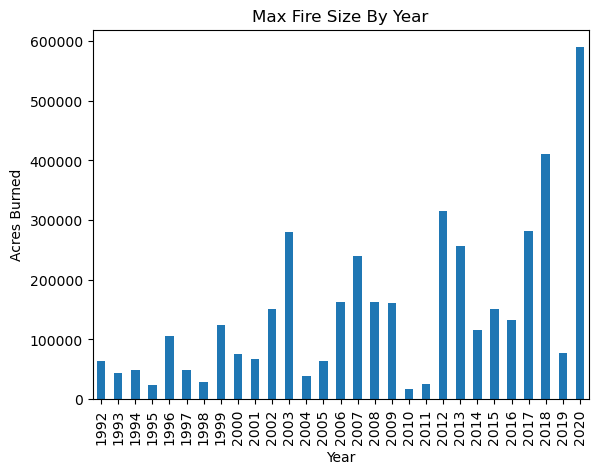

In [24]:

# Fill-in ___ and ...
fires.query('state == "CA"') \
     .groupby('fire_year') \
     .acres_burned.max()\
     .plot(kind='bar',title='Max Fire Size By Year',ylabel='Acres Burned',xlabel='Year');


<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

### Question 3a (ii): Fire Count By Month in California

Create a barplot of the number of fires by month in California. The x-axis, as before, should be the year and the y-axis is the count of fires. Do you notice any patterns? Which months have the most fires? Does this make sense? For these free-resposne questions, type you answer after the **SOLUTION** cell. 

_Type your answer here, replacing this text._

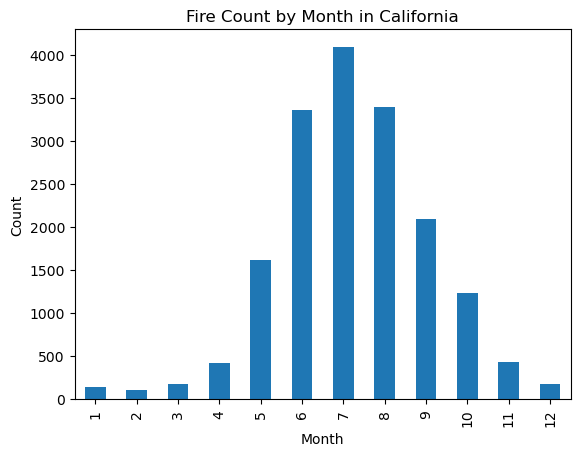

In [25]:

# Fill-in ___ and ...
fires.query('state == "CA"') \
     .groupby('fire_month') \
     .size()\
     .plot(kind='bar',title='Fire Count by Month in California',ylabel='Count',xlabel='Month');

The months that have the most fires are the hottest months in California. During the summer months, mainly June - August, are the hottest months and have the highest counts for fires.

<!-- END QUESTION -->

### Question 3b (i): Ranking states by total acres burned

For each state, calculate the total amount of acres burned and rank each state by that amount. The state with the most acres burned overall should have rank 1 and so on.
Name the dataframe `fires_states` and it should have the state abbreviation be the index and the two columns should be the total acres burned for each state and the rank of each state. The names of these two columns
should be `acres_burned` and `state_rank` respectively. Sort `fires_states` in ascending order by `state_rank`.

HINT: The `rank()` method may come in handy.

In [26]:


# Fill-in ___ and ...
fires_states = fires.groupby('state').acres_burned.agg('sum').reset_index()

# Rank each state in descending order(state with most acres burned should be rank 1)

fires_states['state_rank'] = fires_states['acres_burned'].rank(ascending=False)

# SORT in ASCENDING ORDR BY state_rank

fires_states = fires_states.sort_values(by='state_rank').set_index('state')


In [27]:
grader.check("3bi")

3bi results: All test cases passed!

<!-- BEGIN QUESTION -->

### QUESTION 3b (ii)

Using the `fires_states' from the previous question, for the top 10 ranking states, create a barplot with the state on the x-axis and the total acres burned on the y-axis. Add
appropriate titles and labels. 

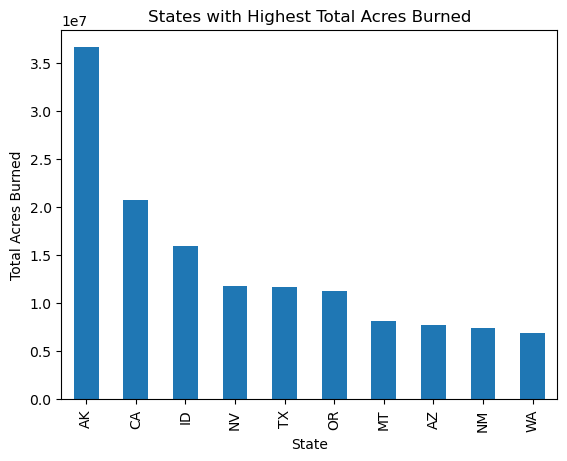

In [28]:

# Fill-in ...
fires_states[:10].plot(y='acres_burned',kind='bar',legend=False,title='States with Highest Total Acres Burned',xlabel='State',ylabel='Total Acres Burned');

<!-- END QUESTION -->

### Question 3c (i): Preparing a DataFrame to total acres burned by year within each state

We have already seen the sum of acres burned overall for each state but suppose we want to see how this changes over the years? 

Create a new `DataFrame` called `fires_states_year` storing the total acres burned by year within each state. The result should be a `DataFrame` with a MultiIndex of `state` and `fire_year` with a sole column representing the total acres burned by year within each state. 

Join `fires_states_year` to `fires_states` to create a `DataFrame` of three columns and then use `reset_index()` to set the indexes to be columns and filter for only states ranking within the top 4, naming the result `fires_states_top_4`.

HINT: Use `join()` to merge/join two `DataFrame`s together. Join automatically joins by common index values.

In [29]:


# Fill-in ... and ____
fires_states_year = fires.groupby(['state', 'fire_year'])['acres_burned'].agg('sum').reset_index().set_index('state')


fires_states_top_4 = fires_states_year.join(fires_states,lsuffix='_by_year',rsuffix='_total').query('state_rank <= 4').reset_index() # lsuffix and rsuffix are used here to append strings
#to the end of common column names in the two dataframes we are joining(acres_burned) in order to differentiate between them. The default is to add an x and a y so we can use
#this to make it more informative. 

fires_states_top_4

,state,fire_year,acres_burned_by_year,acres_burned_total,state_rank
0,AK,1992,142444.700,3.664577e+07,1.0
1,AK,1993,686630.500,3.664577e+07,1.0
2,AK,1994,261604.700,3.664577e+07,1.0
3,AK,1995,43762.600,3.664577e+07,1.0
4,AK,1996,598407.200,3.664577e+07,1.0
...,...,...,...,...,...
111,NV,2016,267188.400,1.182666e+07,4.0
112,NV,2017,1136500.630,1.182666e+07,4.0
113,NV,2018,1070255.400,1.182666e+07,4.0
114,NV,2019,80919.390,1.182666e+07,4.0


In [30]:
grader.check("3ci")

3ci results: All test cases passed!

<!-- BEGIN QUESTION -->

### Question 3c (ii): Preparing a DataFrame to total acres burned by year within each state

Using `fires_states_top_4` and `seaborn`, create four lineplots corresponding to each of the top 4 states showing the change in acres burned over the years. The result should be a plot with 2 rows and 2 columns, one lineplot for each state. The line color for each state/plot should be different. 

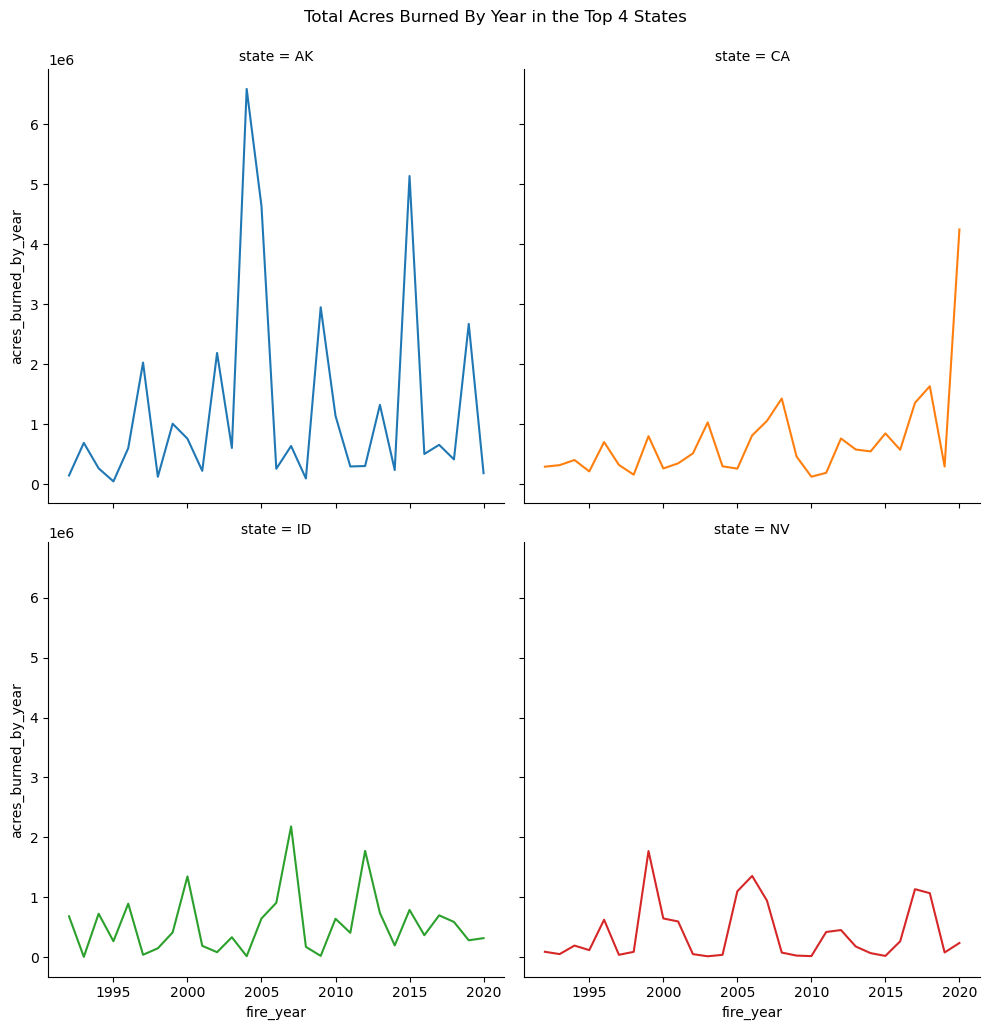

In [31]:

# Fill-in ... and ____
g = sns.relplot(data=fires_states_top_4,kind='line',x='fire_year',y='acres_burned_by_year',hue='state',col='state',col_wrap=2,legend=False);
g.fig.suptitle('Total Acres Burned By Year in the Top 4 States',y=1.025); # Super Title For Entire Plot

<!-- END QUESTION -->

## Question 4: Using GeoPandas to plot fires on maps

Now that we have created some nice plots, it would be nice if we could view the locations of the fires on maps of states so we can get a visual 
understanding of where they tend to occur and reaffirm our analyses from above. We will be using `GeoPandas` which you can think of `pandas` but extended to work with geospatial data. 
The data we will be working with that stores the map information for the United States is located in the `Maps` subfolder as shape files. These are special files
formats for storing geographic information. We will first go through a demonstration of this to see it in action. You will notice there are other files as well that are needed for the rendering of the plots. 


First, lets load the map of the USA and get it displayed. We load the shape file `states.shp` located inside the `Maps` subfolder.

In [32]:
usa = geo.read_file('Maps/states.shp')
usa


,STATE_NAME,DRAWSEQ,STATE_FIPS,SUB_REGION,STATE_ABBR,geometry
0,Hawaii,1,15,Pacific,HI,"MULTIPOLYGON (((-160.07380 22.00418, -160.0497..."
1,Washington,2,53,Pacific,WA,"MULTIPOLYGON (((-122.40202 48.22522, -122.4628..."
2,Montana,3,30,Mountain,MT,"POLYGON ((-111.47543 44.70216, -111.48080 44.6..."
3,Maine,4,23,New England,ME,"MULTIPOLYGON (((-69.77728 44.07415, -69.85993 ..."
4,North Dakota,5,38,West North Central,ND,"POLYGON ((-98.73044 45.93827, -99.00683 45.939..."
5,South Dakota,6,46,West North Central,SD,"POLYGON ((-102.78838 42.99530, -103.00588 42.9..."
6,Wyoming,7,56,Mountain,WY,"POLYGON ((-104.05362 41.69822, -104.05550 41.5..."
7,Wisconsin,8,55,East North Central,WI,"MULTIPOLYGON (((-87.74856 44.96162, -87.83999 ..."
8,Idaho,9,16,Mountain,ID,"POLYGON ((-117.02630 43.67903, -117.02379 43.7..."
9,Vermont,10,50,New England,VT,"POLYGON ((-73.25806 42.74606, -73.26928 42.747..."


We see a familiar looking `DataFrame` style output and that is because the core data structure in `geopandas` is the `GeoDataFrame`, an augmented `DataFrame`. The `geometry` column is the bread-and-butter that stores the locations of the points in terms of longitude and latitude. We can infer that the above is storing the points on the boundaries of the states for each state.

To plot the map associated with it, we simply just call the `plot()` function. There are options to change the colors of the edges and fill as you will explore in the next question

<Axes: >

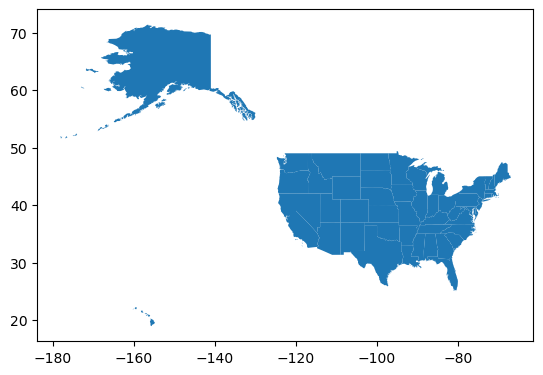

In [33]:
usa.plot()

<!-- BEGIN QUESTION -->

# Question 4a  Get and plot a map of California


Filter  `usa` for the state of California and plot the corresponding map. Set the fill color(part inside boundary of state) to be `white` and the edgecolor to be `black`

<Axes: >

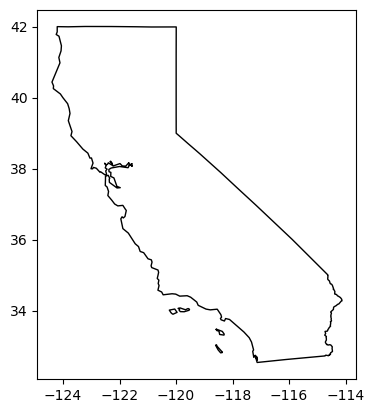

In [34]:
# Fill-in ...
usa[usa['STATE_NAME']=='California'].plot(edgecolor = 'black', facecolor = 'white')

<!-- END QUESTION -->

# Question 4b: Create a GeoDataFrame of the California Fires in the year 2015. 

Lets focus solely on 2020 forest fires in Calfifornia and create a new `GeoDataFrame`. First filter `fires` for 2020 forest fires in Calfornia and then use `geo.GeoDataFrame()` to create the `GeoDataFrame`. Save it in a variable called `fires_CA_2020_locations`.

HINT:
[GeoDataFrame](https://geopandas.org/en/stable/gallery/create_geopandas_from_pandas.html)

In [35]:

# Fill-in ... and 
ca_2020_fires = fires.query('state == "CA" & fire_year == 2020')
fires_ca_2020_locations = geo.GeoDataFrame(ca_2020_fires, geometry=geo.points_from_xy(fires.query('state == "CA" & fire_year == 2020').longitude, fires.query('state == "CA" & fire_year == 2020').latitude))
fires_ca_2020_locations.head()

,fire_name,acres_burned,state,latitude,longitude,fire_year,discovery_date,contains_date,fire_month,days_burning,geometry
2174059,MILE POST 21,130.0,CA,41.168100,-123.696700,2020,2020-07-20,2020-08-31,7,42.0,POINT (-123.69670 41.16810)
2174076,JONES PONIT,130.0,CA,41.046400,-123.664400,2020,2020-08-08,2020-08-23,8,15.0,POINT (-123.66440 41.04640)
2179613,TULE,43.6,CA,41.919444,-121.485501,2020,2020-10-02,2020-10-02,10,0.0,POINT (-121.48550 41.91944)
2179621,SANDY,22.7,CA,37.184856,-120.651794,2020,2020-09-08,2020-09-08,9,0.0,POINT (-120.65179 37.18486)
2180129,CALDWELL,82018.0,CA,41.698889,-121.476944,2020,2020-07-22,2020-09-01,7,41.0,POINT (-121.47694 41.69889)


In [36]:
grader.check("4b")

4b results: All test cases passed!

# Question 4c: Use Seaborn to Plot Fires on California map

Plot 2020 fires in California that **burned more than 500 acres** onto the California map using `seaborn`. Vary the color of the fires by how many acres they burned. In other words, fires with mores acres burned should be 
darker. Use the `flare` palette for this.

Also vary the sizes of the fires by how many acres they burned as well. In other words, fires that burned more acres should appear as bigger points.


 Have the California map be filled in white with a black edge color. 

HINT:
`sns.scatterplot()`

[Text(0.5, 1.0, 'California fires in 2020 over 500 acres'),
 Text(135.46433428754722, 0.5, ''),
 Text(0.5, 23.52222222222222, '')]

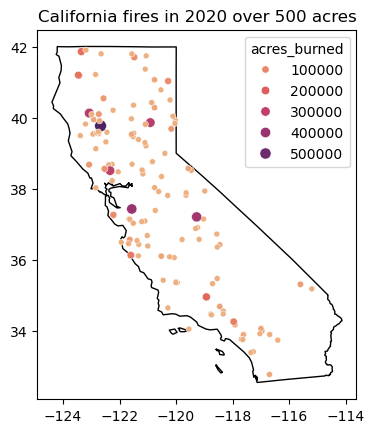

In [37]:
ca_map = usa.query('STATE_NAME == "California"')
ca_map.plot(edgecolor = 'black', facecolor = 'white')
ax = sns.scatterplot(data=fires_ca_2020_locations[fires_ca_2020_locations['acres_burned'] > 500],x='longitude',y='latitude',size='acres_burned',hue='acres_burned',palette='flare')
ax.set(title='California fires in 2020 over 500 acres' ,ylabel='',xlabel='') # Adding a title and removing x and y labels.

<!-- BEGIN QUESTION -->

# Question 4d: Plot the fires in the continental United States.

Repeat the above procedure for all fires that burned more than 100,000 acres in the continental USA(ignore Hawaii and Alaska). Like before, fires that burned more acres should appear darker
and bigger. Add an appropriate title. Your plot should be a map of the continental USA with points representing locations of fires. 

[Text(0.5, 1.0, 'USA fires that burned over 100,000 acres'),
 Text(46.972222222222214, 0.5, ''),
 Text(0.5, 76.7838550090192, '')]

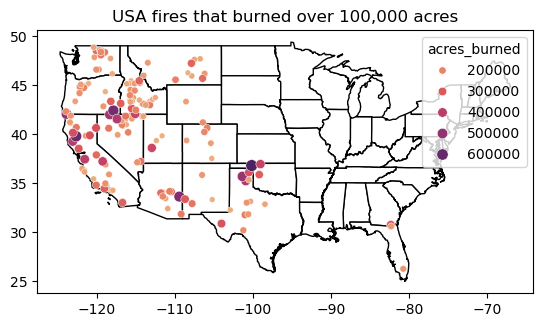

In [38]:
# Fill-in ...
usa_map = usa.query('STATE_NAME not in ("Hawaii", "Alaska")')
usa_map.plot(edgecolor = 'black', facecolor = 'white')
fire_data = fires.query('state not in ("HI", "AK")')
ax = sns.scatterplot(data=fire_data[fire_data['acres_burned'] > 100000],x='longitude',y='latitude',size='acres_burned',hue='acres_burned',palette='flare')
ax.set(title='USA fires that burned over 100,000 acres' ,ylabel='',xlabel='')

<!-- END QUESTION -->

_Intentionally Blank_

## Submission

Make sure you have run all cells in your notebook in order before running the cell below, so that all images/graphs appear in the output. The cell below will generate a zip file for you to submit. **Please save before exporting!**

Download the zip file and submit to Gradescope.

In [39]:
# Save your notebook first, then run this cell to export your submission.
grader.export(run_tests=True)

Running your submission against local test cases...


Your submission received the following results when run against available test cases:

    q1a results: All test cases passed!

    q1bi results: All test cases passed!

    q1bii results: All test cases passed!

    q1biii results: All test cases passed!

    q1biv results: All test cases passed!

    q1bv results: All test cases passed!

    q2 results: All test cases passed!

    3bi results: All test cases passed!

    3ci results: All test cases passed!

    4b results: All test cases passed!
